No step column found for sorting in sit_format copy 2
No step column found for sorting in sit_format copy
No step column found for sorting in sit_format
Saved grouped comparison plot to: ./logs/comparison_plots_grouped.png


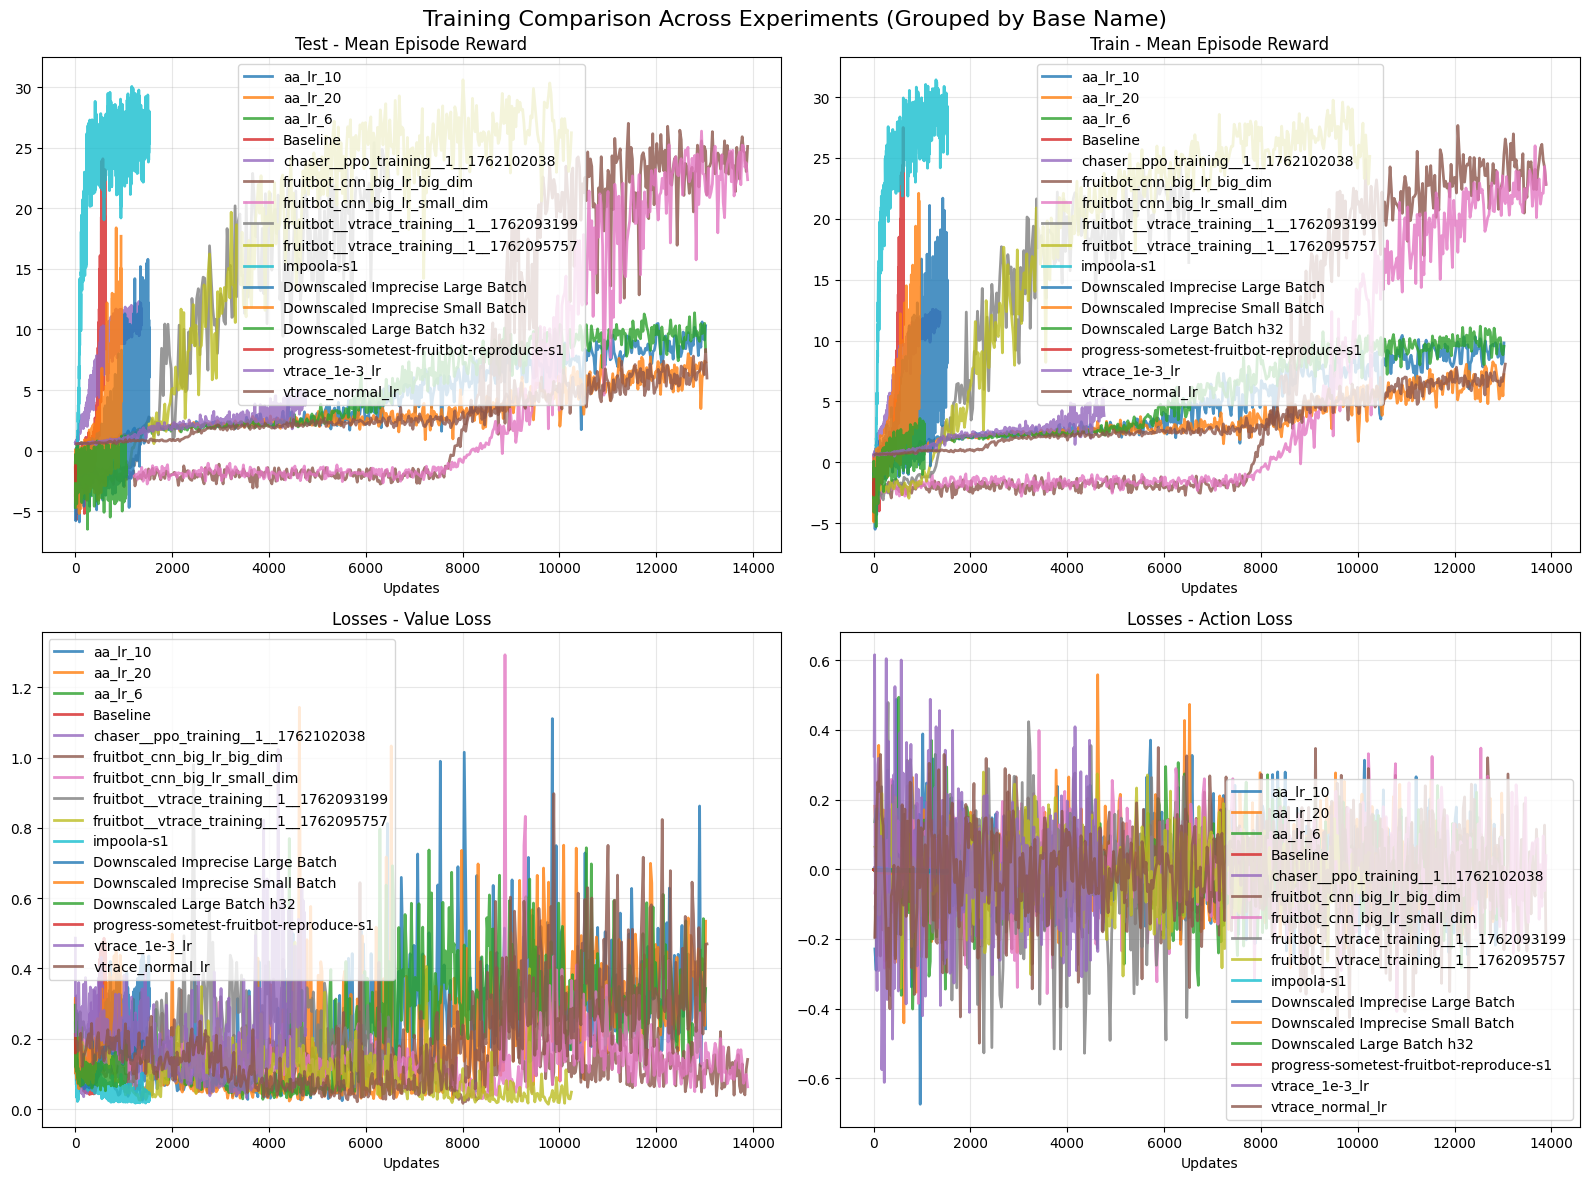

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

base_name_to_readable = {
    "BASELINE-progress-Siet-fruitbot-reproduce-s1": "Baseline",
    "progress-FP16b18ppo2h64-fruitbot-reproduce-s1": "Downscaled Imprecise Large Batch",
    "progress-FP16b96ppo2h64-fruitbot-reproduce-s1": "Downscaled Imprecise Small Batch",
    "progress-Siet-fruitbot-reproduce-s1": "Downscaled Large Batch h32"
}

def try_get_readable_name(base_name):
    return base_name_to_readable.get(base_name, base_name)

def extract_base_name(fname):
    """Extract base name using the last '-' and e[number] rule."""
    name = fname.replace('.csv', '')
    parts = name.rsplit('-', 1)
    if len(parts) == 2 and re.fullmatch(r"e\d+", parts[1]):
        return parts[0]
    return name

def plot_training_logs():
    """Plot all CSV files in the logs directory"""
    
    # Get all CSV files in the logs directory
    log_files = glob.glob('./logs/*.csv')
    
    if not log_files:
        print("No CSV files found in ./logs directory")
        return
    
    # Create a comparison plot if multiple files exist
    if len(log_files) > 1:
        create_comparison_plot(log_files)

def create_comparison_plot(log_files):
    """Create comparison plots across different experiments, grouped by base name"""
    
    # Group files by base name
    groups = defaultdict(list)
    for file_path in log_files:
        fname = os.path.basename(file_path)
        base = extract_base_name(fname)
        groups[base].append(file_path)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Training Comparison Across Experiments (Grouped by Base Name)', fontsize=16)
    
    # Key metrics to compare
    comparison_metrics = [
        'test/mean_episode_reward',
        'train/mean_episode_reward', 
        'losses/value_loss',
        'losses/action_loss'
    ]
    
    axes = axes.flatten()
    
    # Process each group (base name)
    for base_name, file_paths in groups.items():
        # Combine all files for this base name
        dfs = []
        for file_path in file_paths:
            try:
                df = pd.read_csv(file_path)
                dfs.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue
        
        if not dfs:
            print(f"No valid CSV data found for {base_name}")
            continue
        
        # Concatenate and sort by step number
        combined_df = pd.concat(dfs, ignore_index=True)
        if 'train/total_num_steps' in combined_df.columns:
            combined_df = combined_df.sort_values('train/total_num_steps')
        elif 'train/nupdates' in combined_df.columns:
            combined_df = combined_df.sort_values('train/nupdates')
        else:
            print(f"No step column found for sorting in {base_name}")
            continue
        
        # Plot each metric for this base name
        for i, metric in enumerate(comparison_metrics):
            if metric in combined_df.columns:
                axes[i].plot(combined_df['train/nupdates'], combined_df[metric], 
                           linewidth=2, label=try_get_readable_name(base_name), alpha=0.8)
                axes[i].set_title(metric.replace('/', ' - ').replace('_', ' ').title())
                axes[i].set_xlabel('Updates')
                axes[i].grid(True, alpha=0.3)
                axes[i].legend()
    
    plt.tight_layout()
    plt.savefig('./logs/comparison_plots_grouped.png', dpi=300, bbox_inches='tight')
    print("Saved grouped comparison plot to: ./logs/comparison_plots_grouped.png")
    plt.show()

plot_training_logs()

No step column found for sorting in aa_lr_10.
No step column found for sorting in aa_lr_20.
No step column found for sorting in aa_lr_6.
No step column found for sorting in BASELINE-progress-Siet-fruitbot-reproduce-s1.
No step column found for sorting in chaser__ppo_training__1__1762102038.
No step column found for sorting in fruitbot_cnn_big_lr_big_dim.
No step column found for sorting in fruitbot_cnn_big_lr_small_dim.
No step column found for sorting in fruitbot__vtrace_training__1__1762093199.
No step column found for sorting in fruitbot__vtrace_training__1__1762095757.
No step column found for sorting in impoola-s1.
No step column found for sorting in progress-FP16b18ppo2h64-fruitbot-reproduce-s1.
No step column found for sorting in progress-FP16b96ppo2h64-fruitbot-reproduce-s1.
No step column found for sorting in progress-Siet-fruitbot-reproduce-s1.
No step column found for sorting in progress-sometest-fruitbot-reproduce-s1.
Saved combined plot to: ./logs/sit_format copy 2_combine

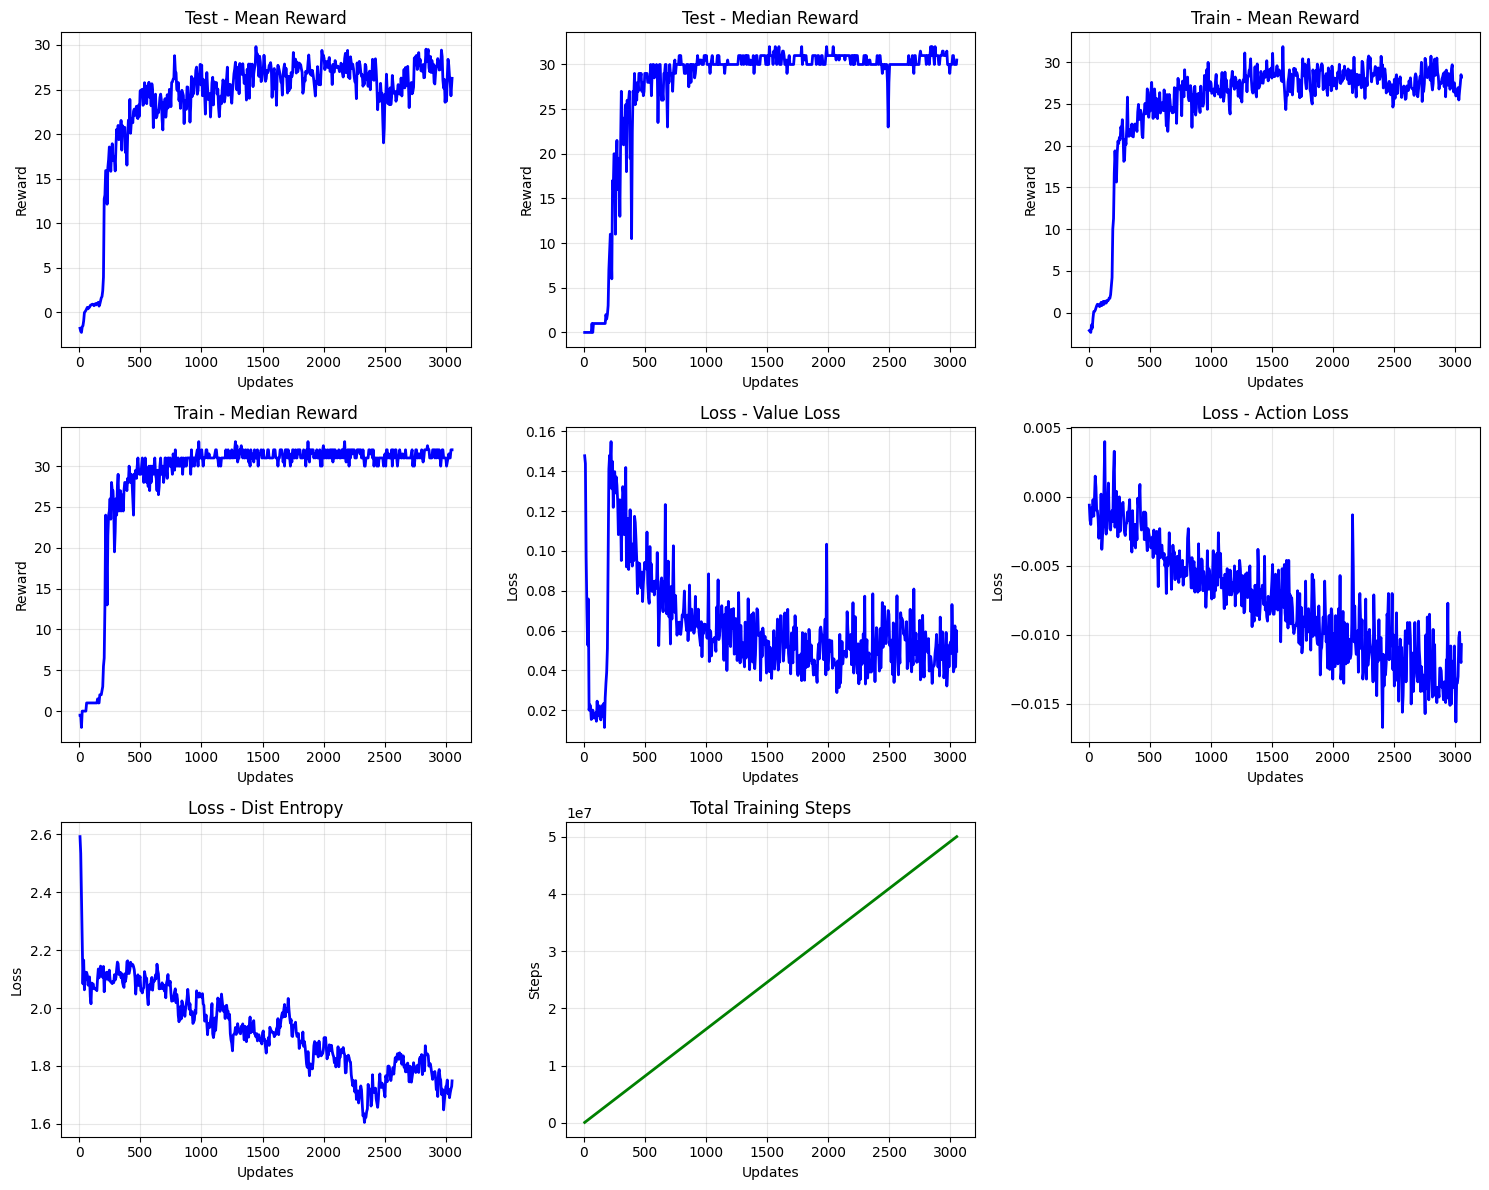

Saved combined plot to: ./logs/sit_format copy_combined_plots.png


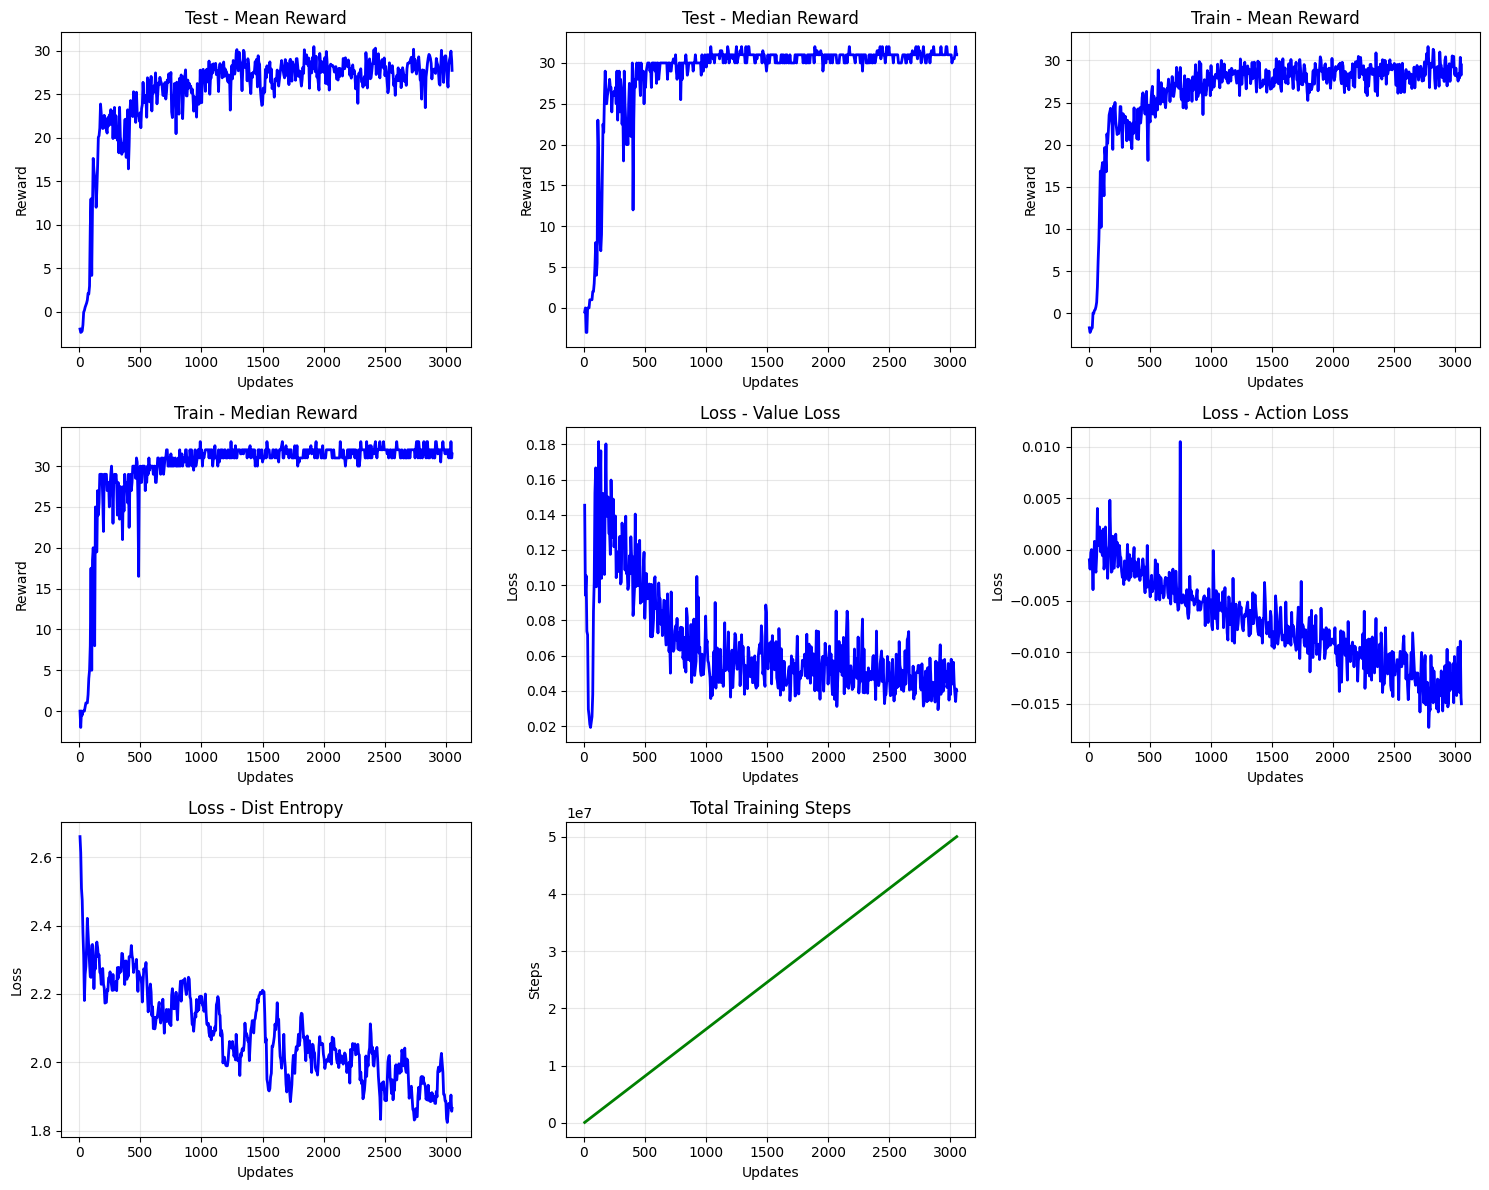

Saved combined plot to: ./logs/sit_format_combined_plots.png


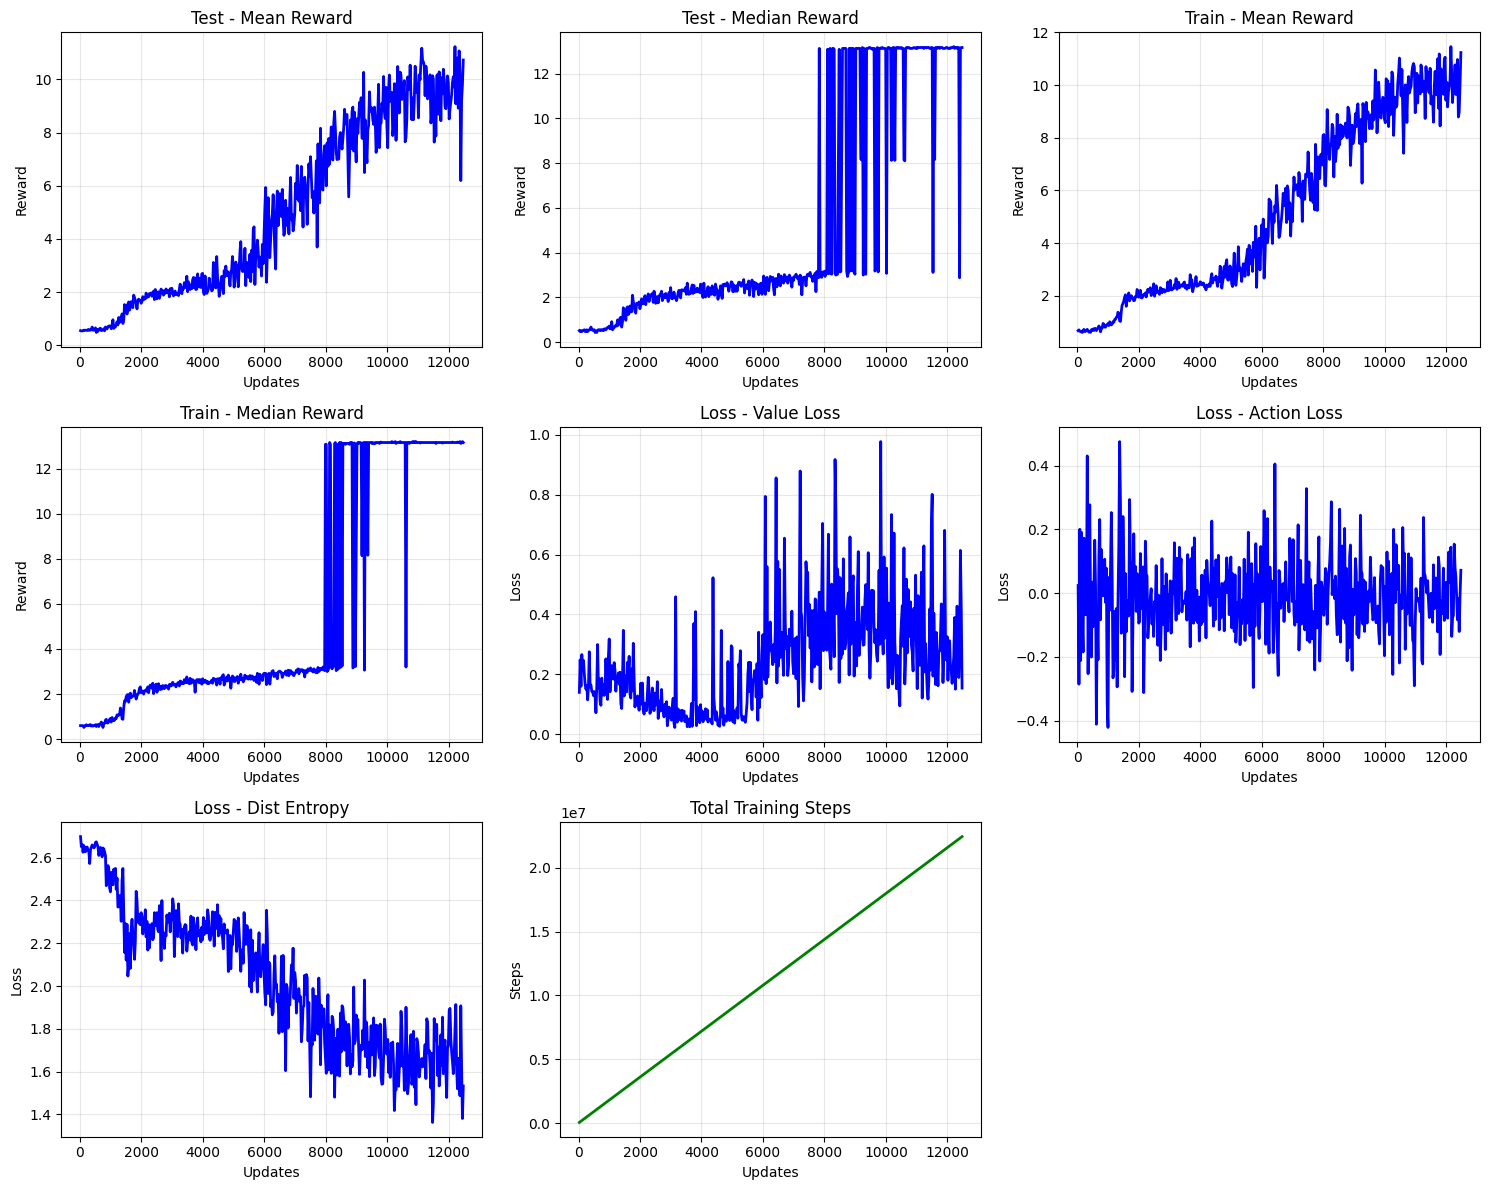

No step column found for sorting in vtrace_1e-3_lr.
No step column found for sorting in vtrace_normal_lr.


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
from collections import defaultdict

def extract_base_name(fname):
    """Extract base name using the last '-' and e[number] rule."""
    name = fname.replace('.csv', '')
    parts = name.rsplit('-', 1)
    if len(parts) == 2 and re.fullmatch(r"e\d+", parts[1]):
        return parts[0]
    return name

def plot_combined_logs_by_base_name():
    """Combine CSV files in ./logs by base name, sort by step, and plot each group."""
    log_files = glob.glob('./logs/*.csv')
    if not log_files:
        print("No CSV files found in ./logs directory")
        return

    # Group files by base name
    groups = defaultdict(list)
    for file_path in log_files:
        fname = os.path.basename(file_path)
        base = extract_base_name(fname)
        groups[base].append(file_path)

    metrics_to_plot = [
        'test/mean_reward',
        'test/median_reward',
        'train/mean_reward',
        'train/median_reward',
        'loss/value_loss',
        'loss/action_loss',
        'loss/dist_entropy'
    ]

    for base, files in groups.items():
        dfs = []
        for file_path in files:
            try:
                df = pd.read_csv(file_path)
                dfs.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

        if not dfs:
            print(f"No valid CSV data found for {base}.")
            continue

        # Concatenate and sort by step number
        combined_df = pd.concat(dfs, ignore_index=True)
        if 'total_steps' in combined_df.columns:
            combined_df = combined_df.sort_values('total_steps')
        elif 'nupdates' in combined_df.columns:
            combined_df = combined_df.sort_values('nupdates')
        else:
            print(f"No step column found for sorting in {base}.")
            continue

        # Plot metrics
        fig, axes = plt.subplots(3, 3, figsize=(15, 12))
        axes = axes.flatten()
        for i, metric in enumerate(metrics_to_plot):
            if metric in combined_df.columns:
                axes[i].plot(combined_df['nupdates'], combined_df[metric], 'b-', linewidth=2)
                axes[i].set_title(metric.replace('/', ' - ').replace('_', ' ').title())
                axes[i].set_xlabel('Updates')
                axes[i].grid(True, alpha=0.3)
                if 'reward' in metric:
                    axes[i].set_ylabel('Reward')
                elif 'loss' in metric:
                    axes[i].set_ylabel('Loss')
                else:
                    axes[i].set_ylabel('Value')
            else:
                axes[i].text(0.5, 0.5, f'{metric}\nNot Found',
                             ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{metric} (Not Found)')

        # Plot training steps vs updates in the last subplot
        if 'total_steps' in combined_df.columns:
            axes[7].plot(combined_df['nupdates'], combined_df['total_steps'], 'g-', linewidth=2)
            axes[7].set_title('Total Training Steps')
            axes[7].set_xlabel('Updates')
            axes[7].set_ylabel('Steps')
            axes[7].grid(True, alpha=0.3)
        else:
            axes[7].text(0.5, 0.5, 'Total Steps\nNot Found',
                         ha='center', va='center', transform=axes[7].transAxes)

        axes[8].axis('off')
        plt.tight_layout()
        output_path = f'./logs/{base}_combined_plots.png'
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved combined plot to: {output_path}")
        plt.show()

plot_combined_logs_by_base_name()